In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [14]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [15]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [16]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [17]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [18]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [20]:
# different cc_miles have different max values.
print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [21]:
# Missing values
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [22]:
# Checking Duplicate values
print("in this dataset:",data.duplicated().sum()," duplicate rows are there")

in this dataset: 1  duplicate rows are there


In [23]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [24]:
# Drop the duplicate column
data.drop_duplicates(inplace = True)
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,


In [25]:
data.shape

(3998, 11)

## EDA

array([[<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>,
        <Axes: title={'center': 'cc1_miles'}>],
       [<Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>,
        <Axes: title={'center': 'Bonus_miles'}>],
       [<Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>,
        <Axes: title={'center': 'Flight_trans_12'}>],
       [<Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award'}>, <Axes: >]], dtype=object)

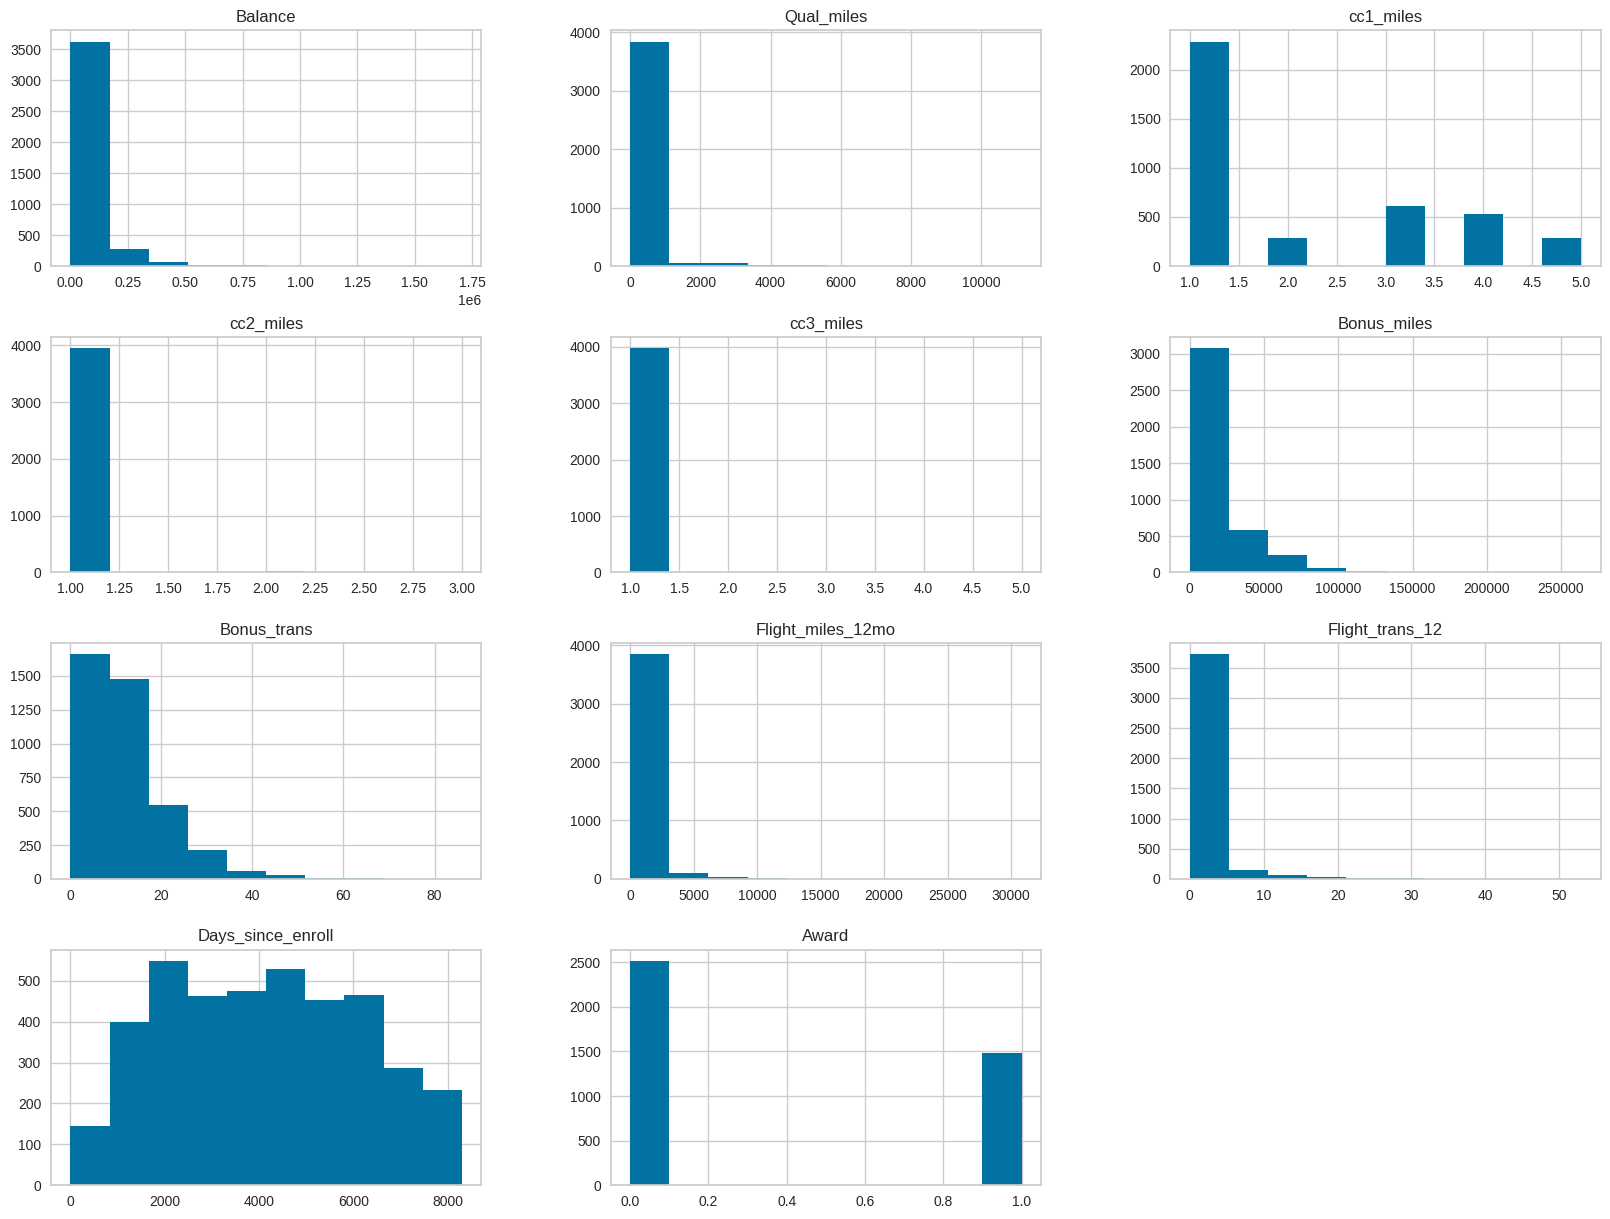

In [26]:
# Histogram
data.hist(figsize = (20,15))

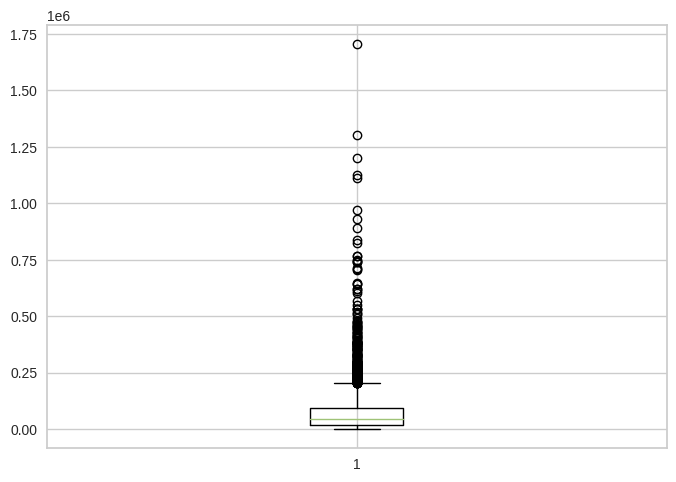

In [28]:
# BoxPlot
box1 = plt.boxplot(x="Balance", data = data)

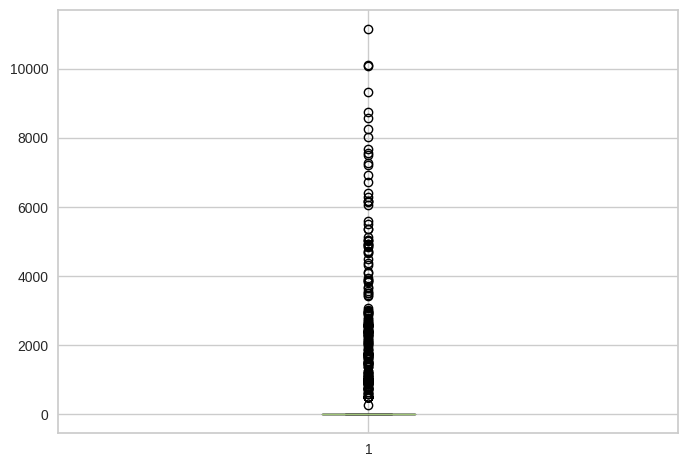

In [29]:
box2 = plt.boxplot(x="Qual_miles", data = data)

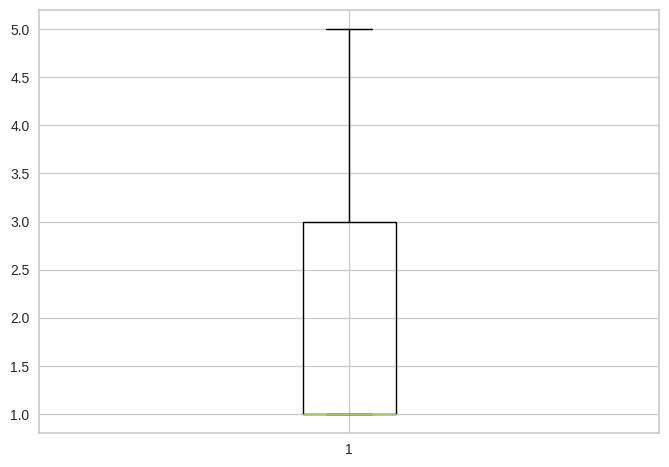

In [30]:
box3 = plt.boxplot(x="cc1_miles", data = data)

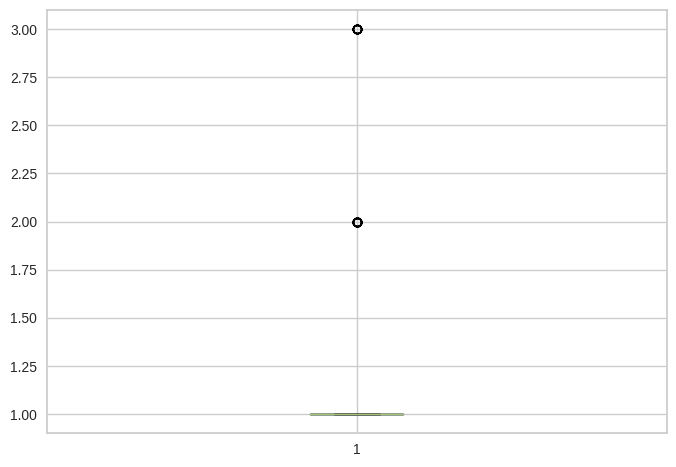

In [31]:
box4 = plt.boxplot(x="cc2_miles", data = data)

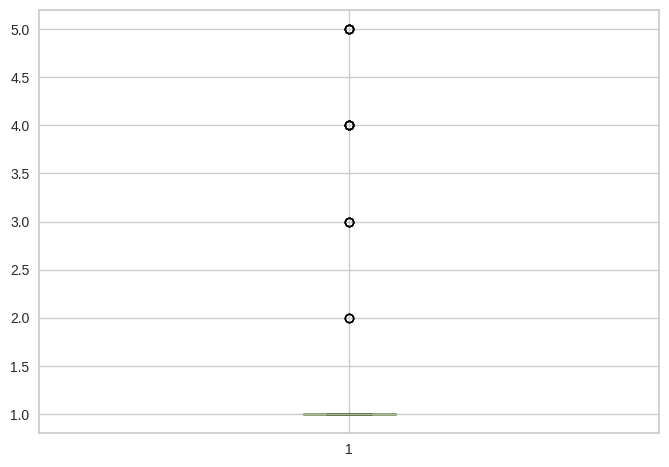

In [32]:
box5 = plt.boxplot(x="cc3_miles", data = data)

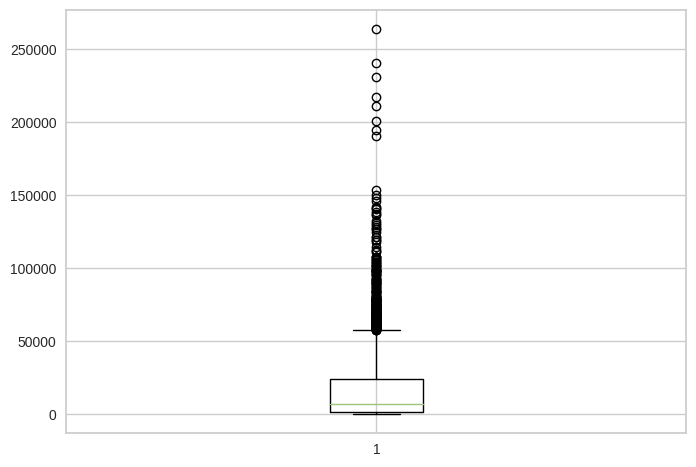

In [33]:
box6 = plt.boxplot(x="Bonus_miles", data = data)

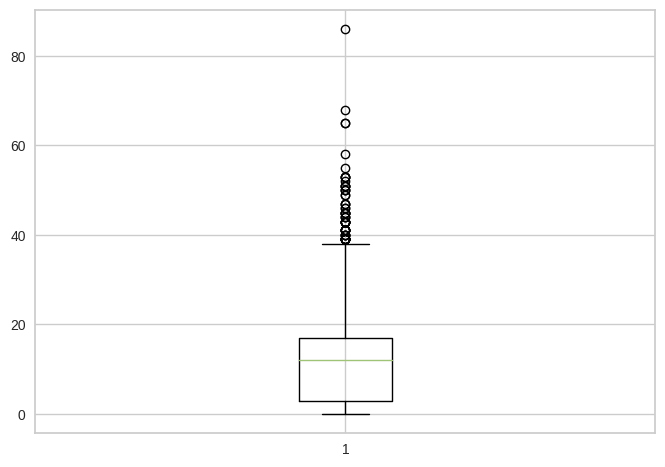

In [34]:
box7 = plt.boxplot(x="Bonus_trans", data = data)

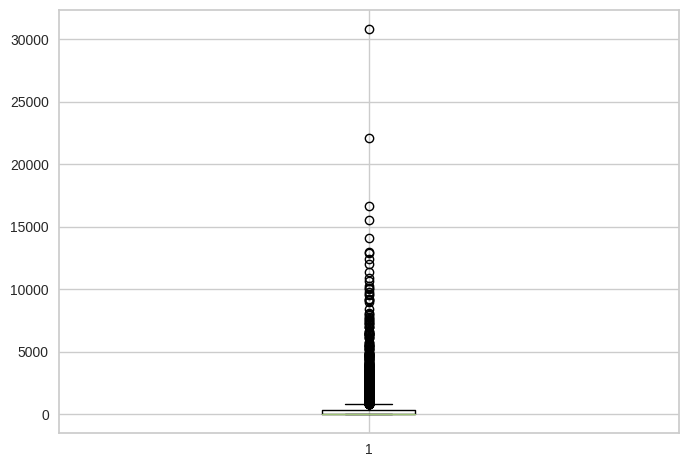

In [35]:
box8 = plt.boxplot(x="Flight_miles_12mo", data = data)

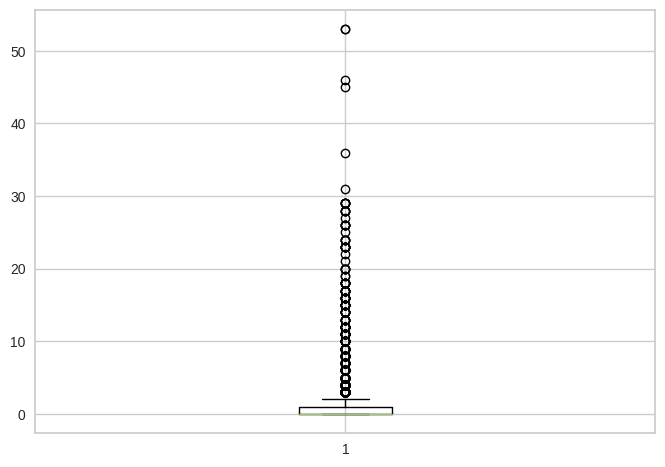

In [36]:
box9 = plt.boxplot(x="Flight_trans_12", data = data)

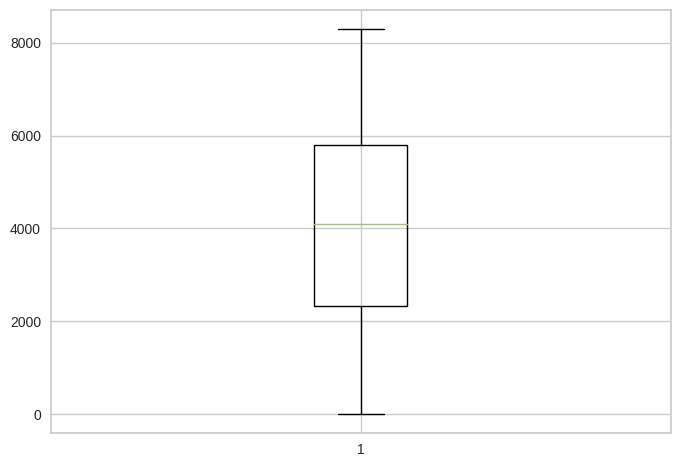

In [37]:
box10 = plt.boxplot(x="Days_since_enroll", data = data)

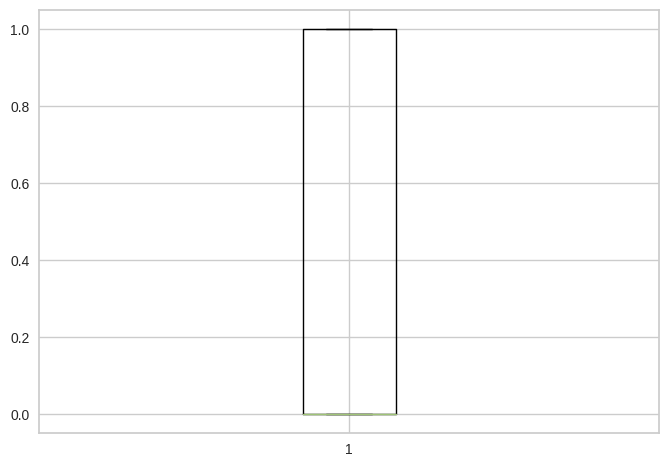

In [38]:
box10 = plt.boxplot(x="Award", data = data)

<Axes: xlabel='Balance', ylabel='Density'>

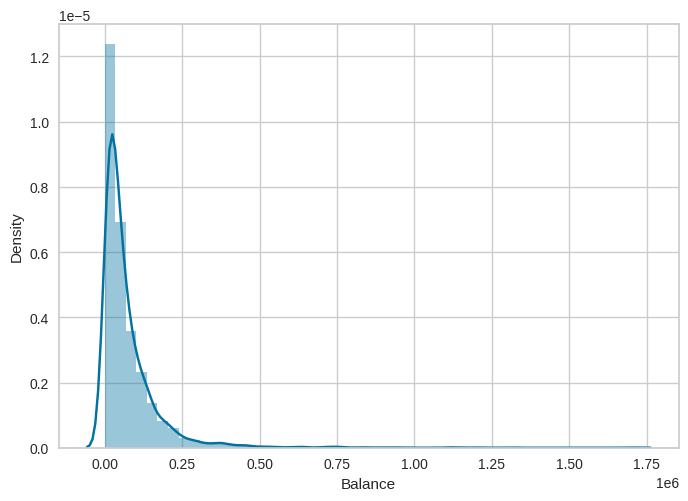

In [40]:
sns.distplot(data["Balance"], hist = True)

<Axes: xlabel='Qual_miles', ylabel='Density'>

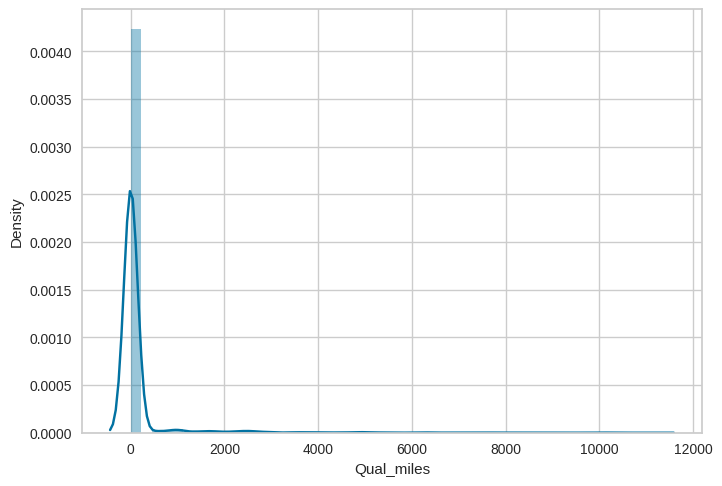

In [41]:
sns.distplot(data["Qual_miles"], hist = True)

<Axes: xlabel='cc1_miles', ylabel='Density'>

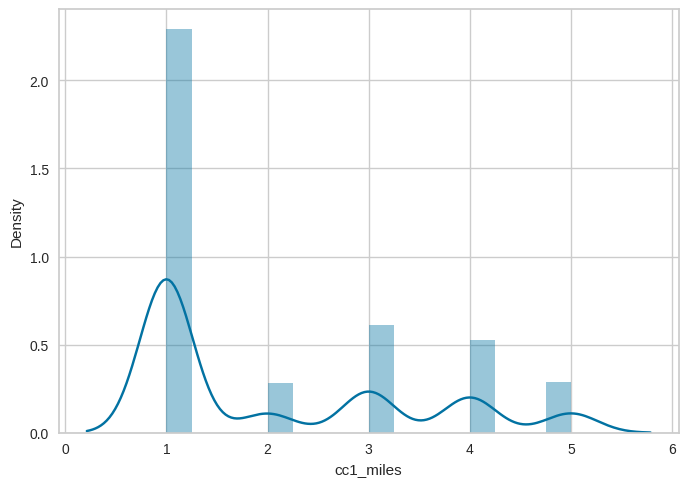

In [42]:
sns.distplot(data["cc1_miles"], hist = True)

<Axes: xlabel='cc2_miles', ylabel='Density'>

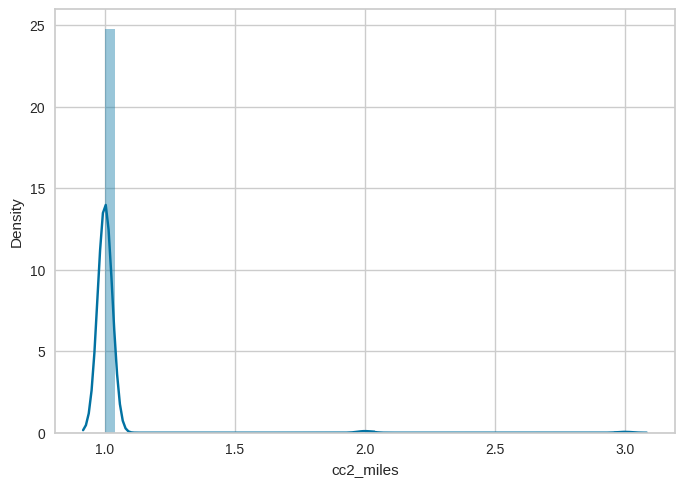

In [44]:
sns.distplot(data["cc2_miles"], hist = True)

<Axes: xlabel='cc3_miles', ylabel='Density'>

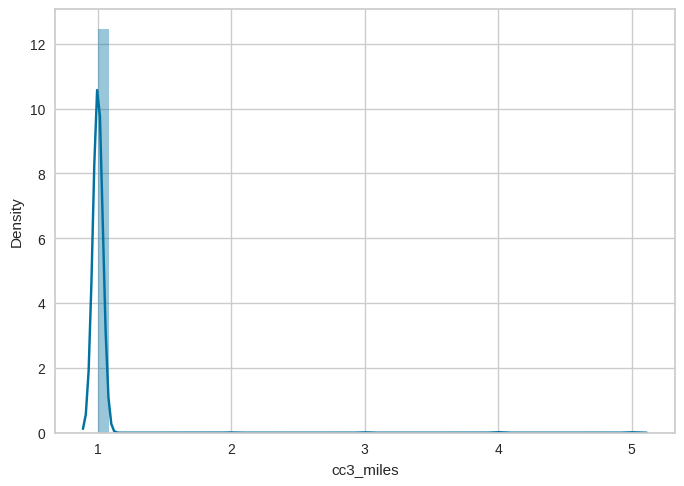

In [45]:
sns.distplot(data["cc3_miles"], hist = True)

<Axes: xlabel='Bonus_miles', ylabel='Density'>

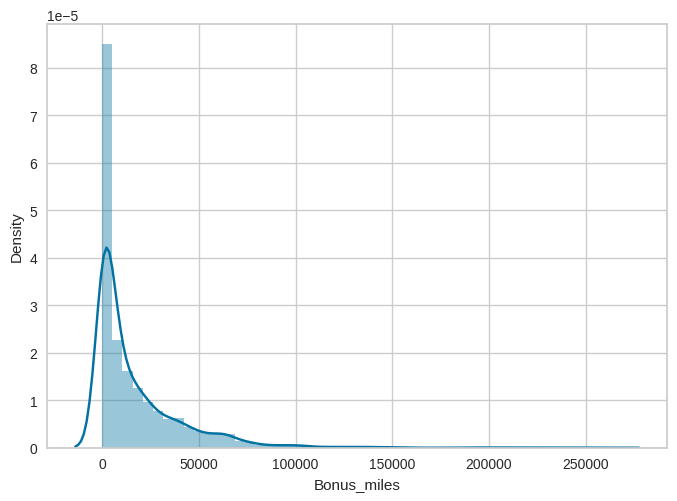

In [46]:
sns.distplot(data["Bonus_miles"], hist = True)

<Axes: xlabel='Bonus_trans', ylabel='Density'>

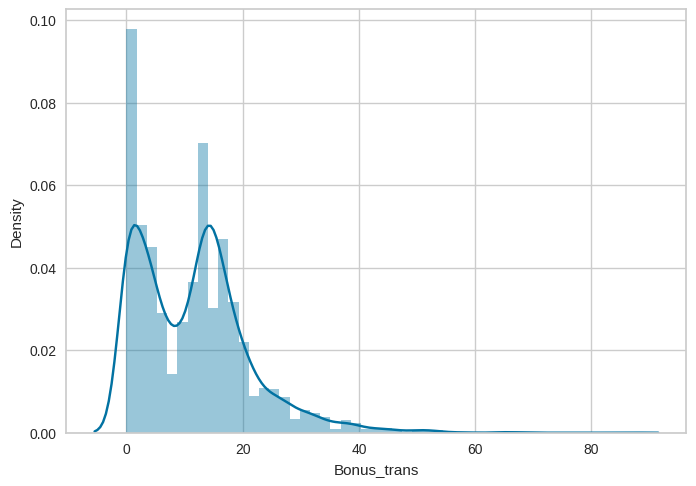

In [47]:
sns.distplot(data["Bonus_trans"], hist = True)

<Axes: xlabel='Flight_miles_12mo', ylabel='Density'>

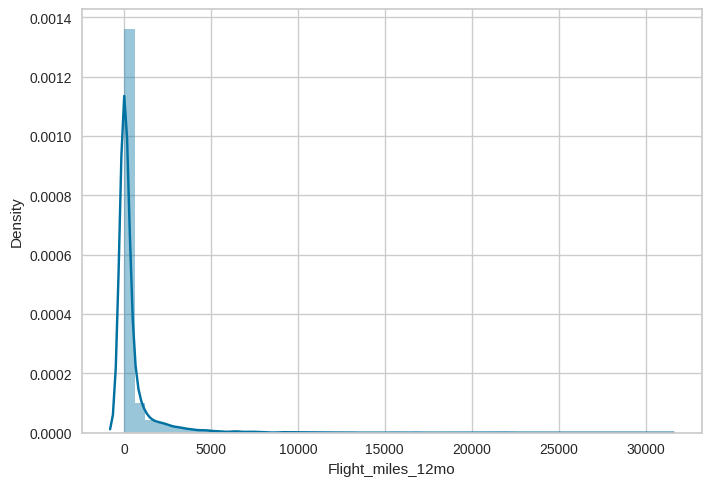

In [48]:
sns.distplot(data["Flight_miles_12mo"], hist = True)

<Axes: xlabel='Flight_trans_12', ylabel='Density'>

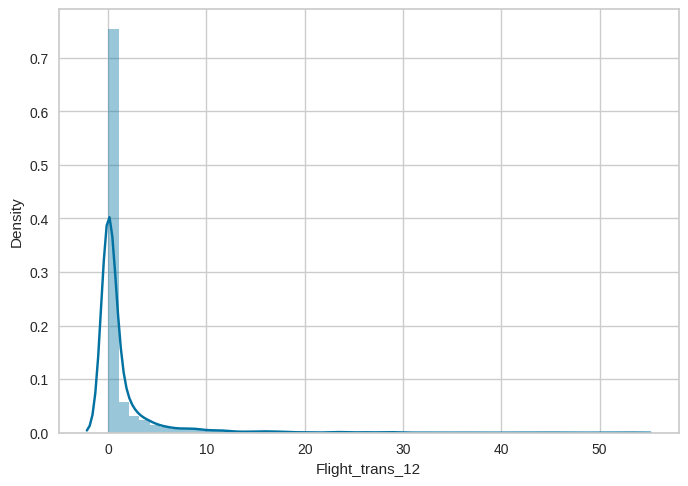

In [49]:
sns.distplot(data["Flight_trans_12"], hist = True)

<Axes: xlabel='Days_since_enroll', ylabel='Density'>

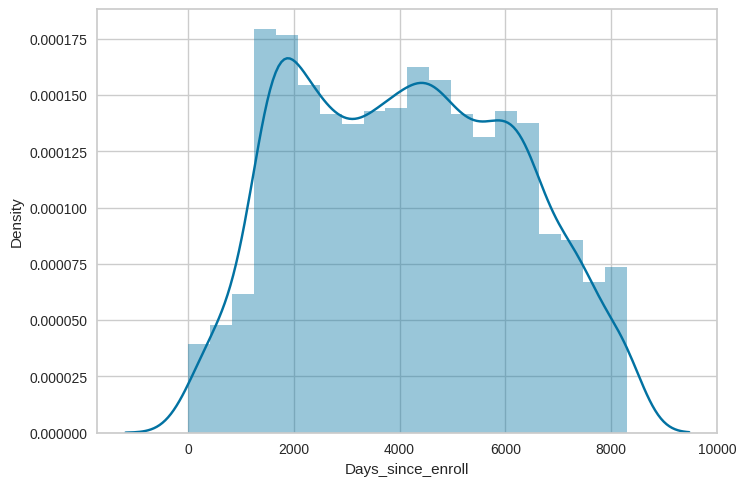

In [50]:
sns.distplot(data["Days_since_enroll"], hist = True)

<Axes: xlabel='Award', ylabel='Density'>

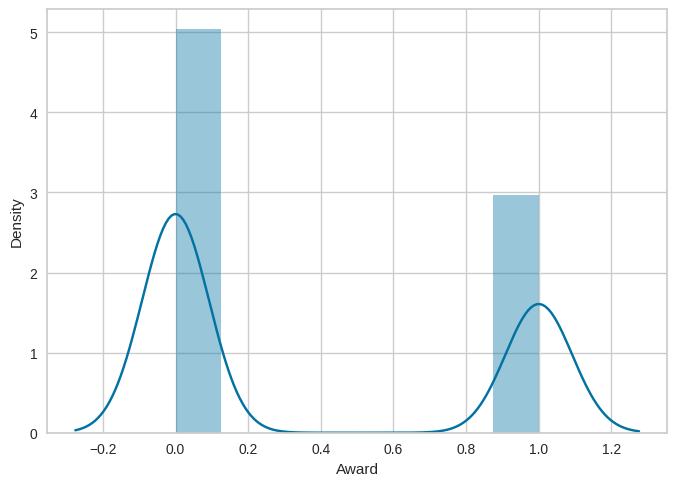

In [51]:
sns.distplot(data["Award"], hist = True)

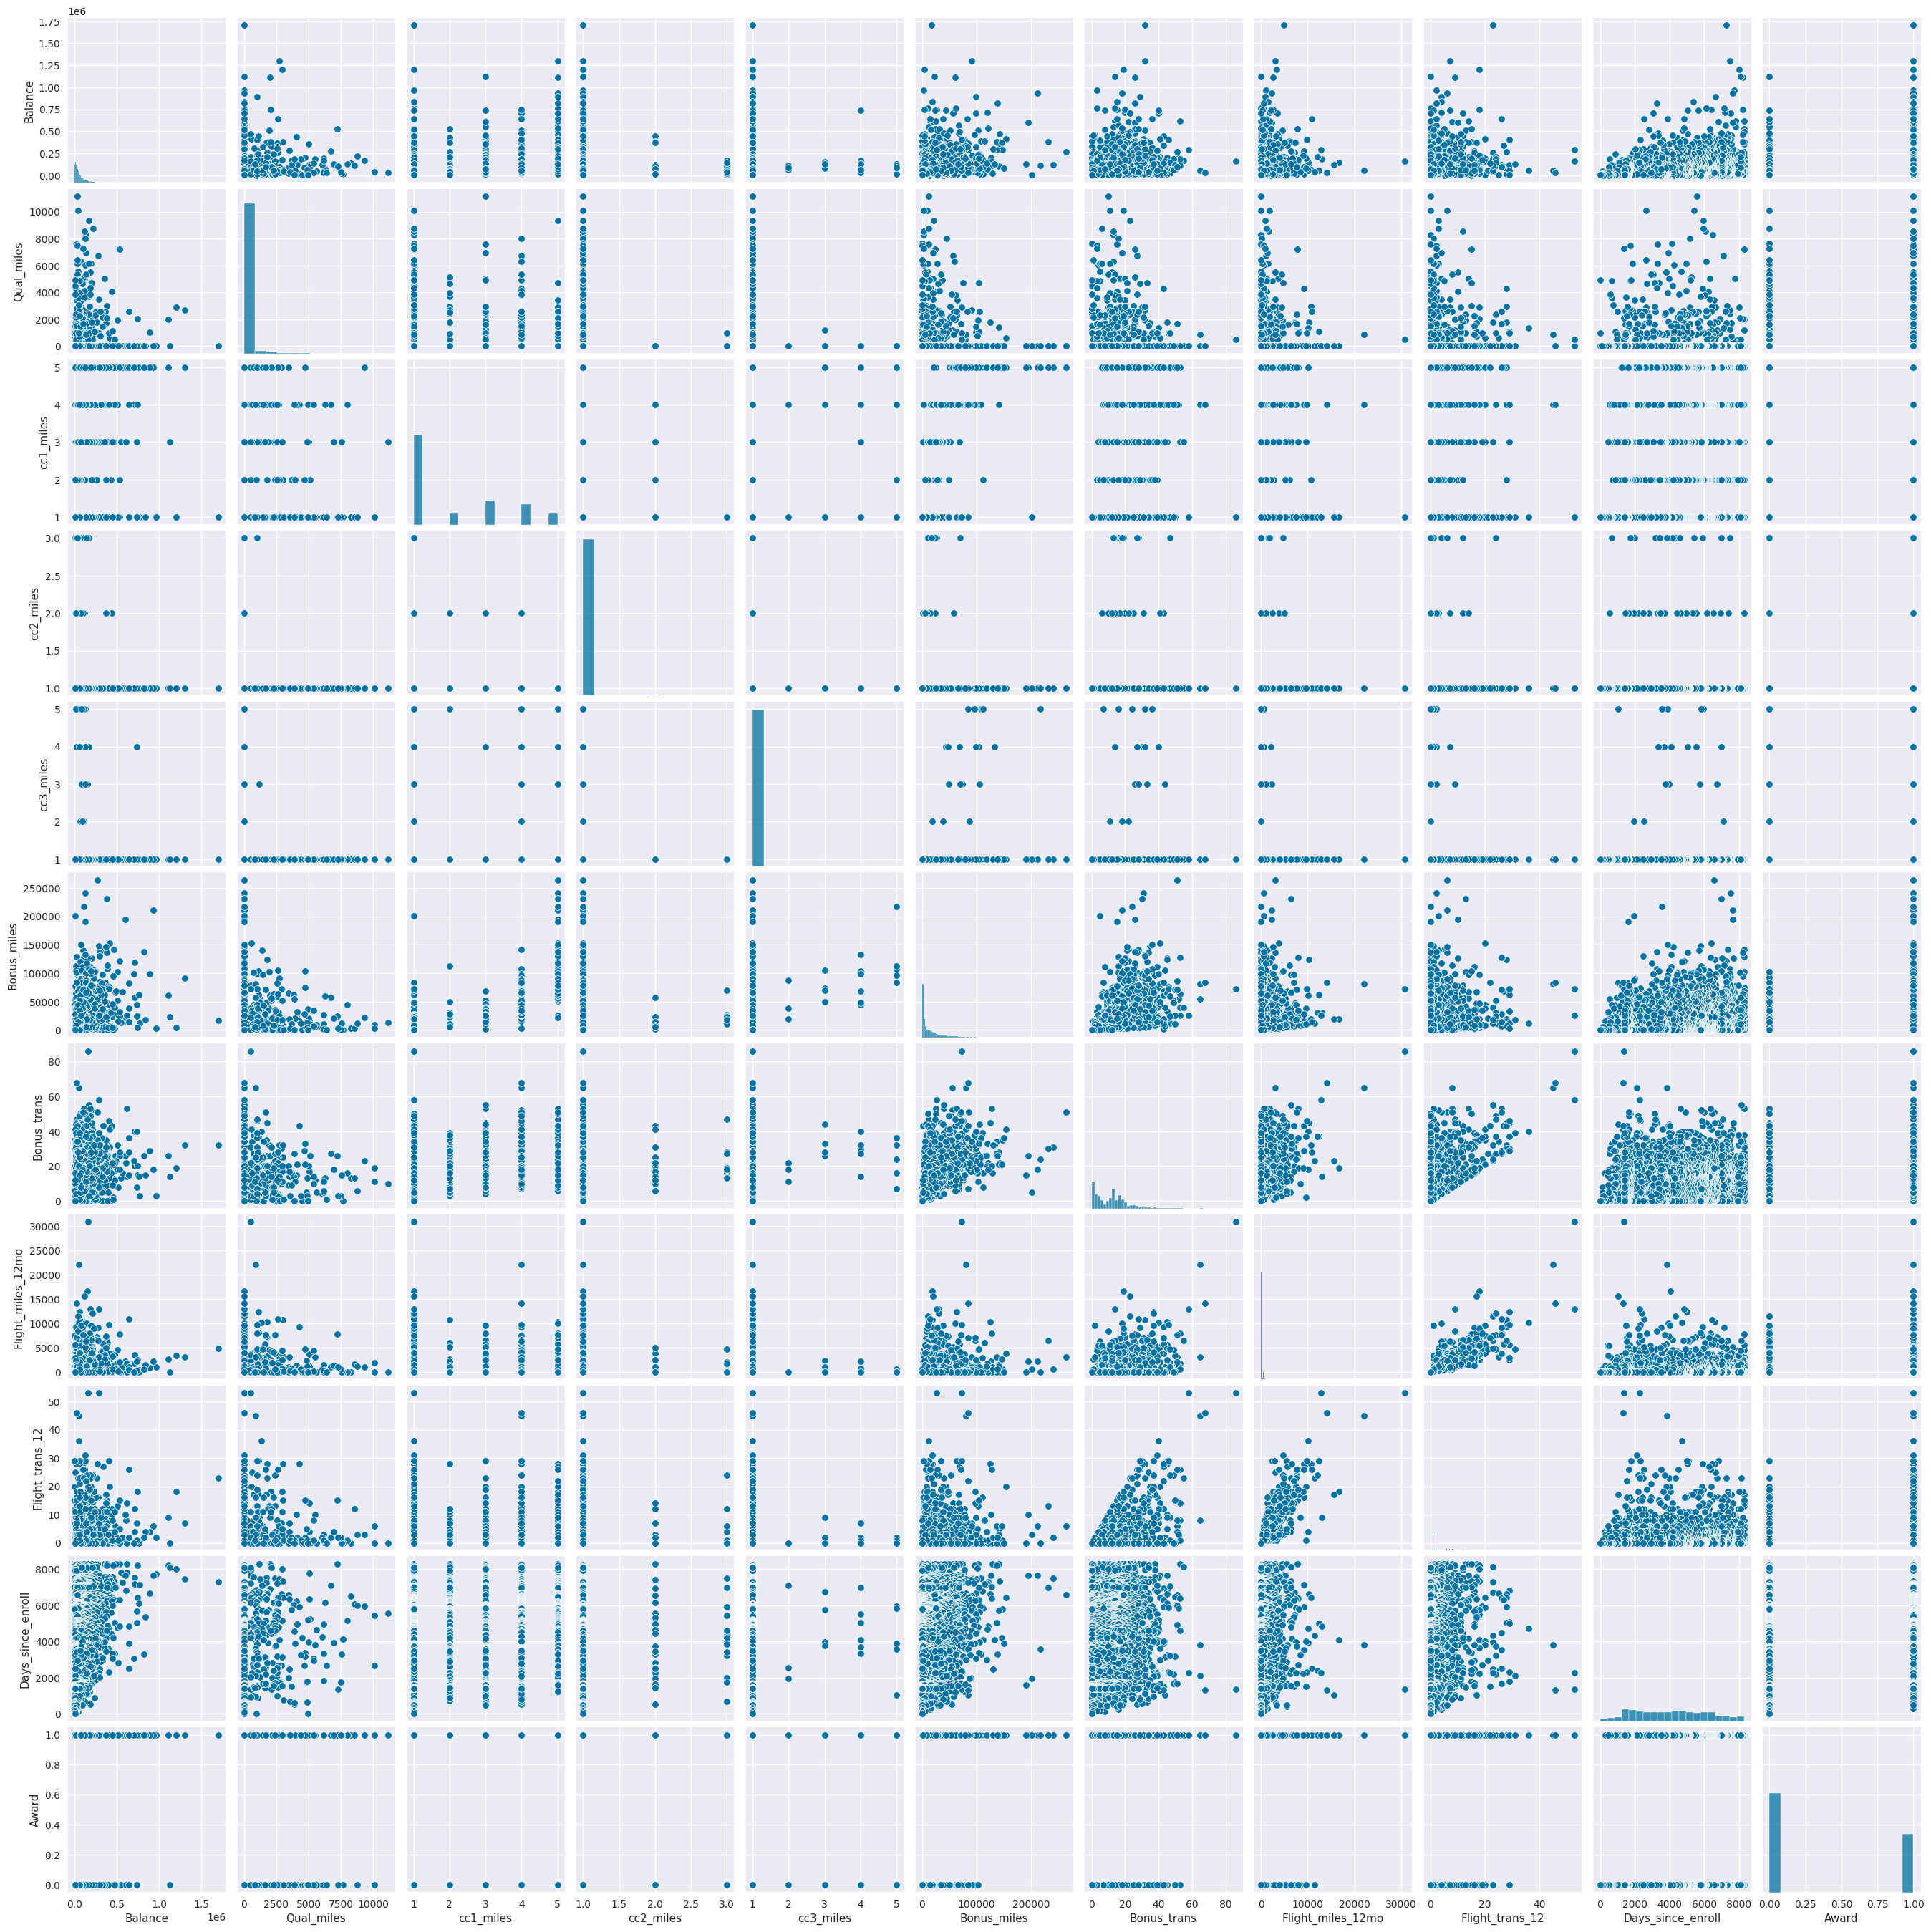

In [55]:
# Pairplot
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [52]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

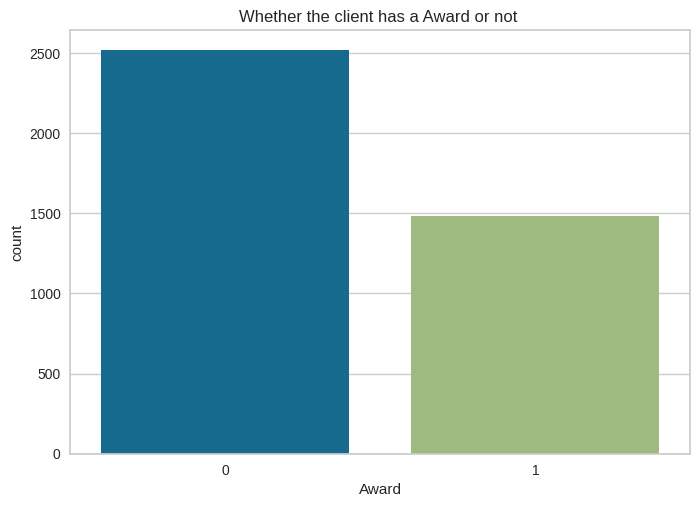

In [53]:
sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 10)
plt.title('Whether the client has a Award or not ')

<Axes: >

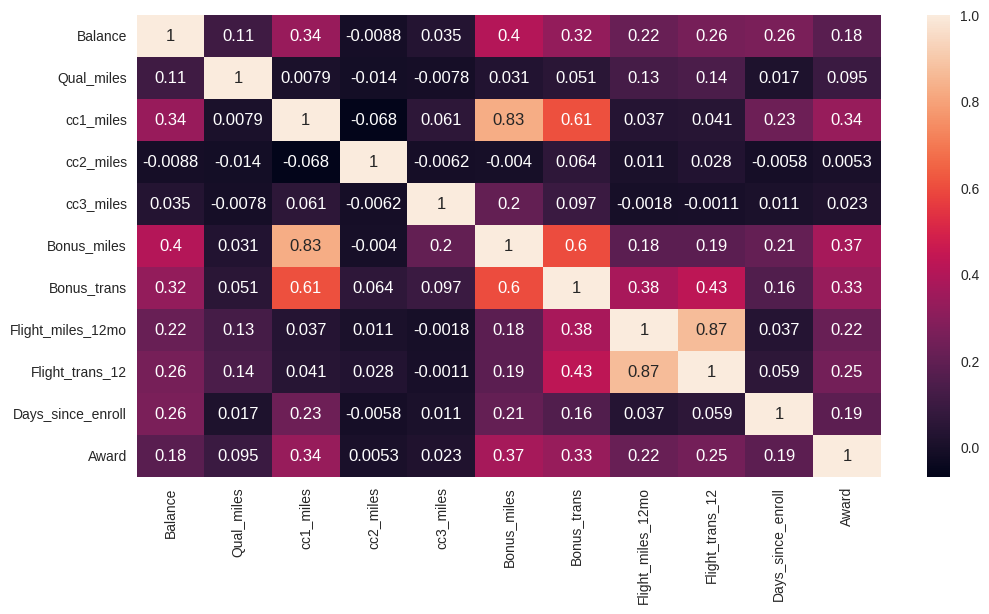

In [54]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

## Data Preprocessing

In [56]:
# Scaling the data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
scale_data

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [57]:
scale_data.shape

(3998, 11)

Normalizing the data

In [59]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_data = minmax.fit_transform(data)
minmax_data

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [61]:
minmax_data.shape

(3998, 11)

## KMeans Clustering

In [112]:
kmeans = KMeans(n_clusters=8,random_state=0)
predict=kmeans.fit_predict(scale_data)

In [113]:
predict

array([1, 1, 1, ..., 0, 4, 4], dtype=int32)

In [62]:
# Standard Scaler applied on data
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(scale_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,43978.000000
1,2,35402.348376
2,3,30893.111682
3,4,27149.157953
4,5,24536.696881
5,6,22299.055049
6,7,18890.459681
7,8,17314.653062
8,9,15961.460886
9,10,14725.185611


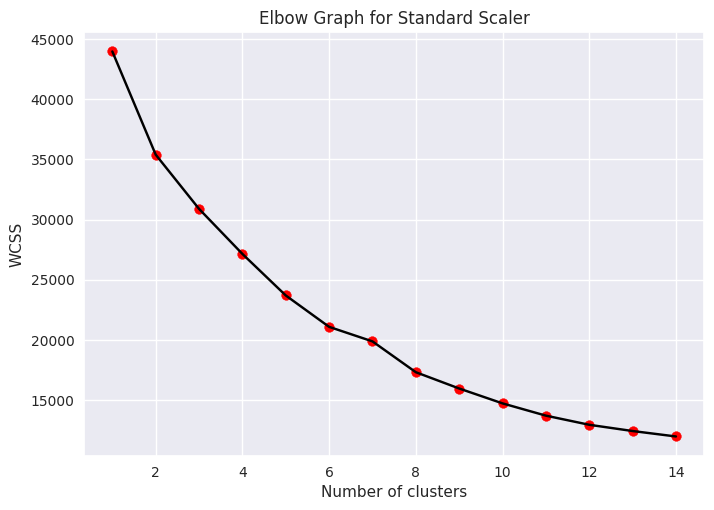

In [64]:
# Elbow Graph for scaled data
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i , random_state = 0)
    kmeans.fit(scale_data)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,15),wcss,color = "black")
plt.scatter(range(1,15),wcss,color= "red")
plt.title("Elbow Graph for Standard Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#K-Means: Inertia
#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.
 #A good model is one with low inertia AND a low number of clusters ( K ).

In [233]:
# build Cluster Algorithm
# looking at the elbow graph we are taking 8 clusters
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters =6 , random_state =0)
clusters_new.fit(scale_data)

KMeans(n_clusters=6, random_state=0)

In [130]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [131]:
# Assign clusters to the data set
data["ClusterID_new"] = clusters_new.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [133]:
# Group Data by clusters( k = 6)
data.groupby("ClusterID_new").agg(["mean"])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterID_new,,,,,,,,,,,
0,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,43899.574007,43.575612,1.229844,1.000000,1.000401,4646.073004,6.855596,199.240273,0.621340,3707.224629,0.200963
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


In [134]:
data[data['ClusterID_new']==0].shape

(143, 12)

In [135]:
data[data['ClusterID_new']==1].shape

(1243, 12)

In [136]:
data[data['ClusterID_new']==2].shape

(2493, 12)

In [137]:
data[data['ClusterID_new']==3].shape

(43, 12)

In [138]:
data[data['ClusterID_new']==4].shape

(15, 12)

In [139]:
data[data['ClusterID_new']==5].shape

(61, 12)

In [140]:
# Silhouette Score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score_average = silhouette_score(scale_data, predict)
silhouette_score_average

0.237314726017899

In [141]:
silhouette_score_average1 = silhouette_score(scale_data, clusters_new.predict(scale_data))
silhouette_score_average1

0.33378006995858245

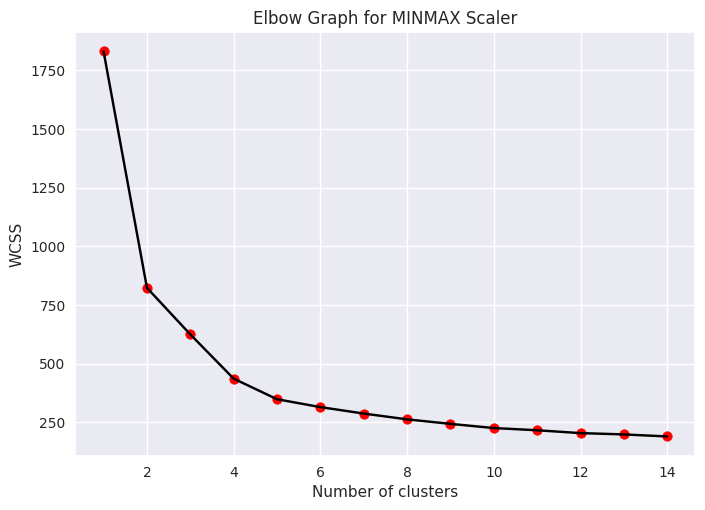

In [237]:
# Elbow Graph for MINMAX data
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i , random_state = 0)
    kmeans.fit(minmax_data)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,15),wcss,color = "black")
plt.scatter(range(1,15),wcss,color= "red")
plt.title("Elbow Graph for MINMAX Scaler")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [242]:
# build Cluster Algorithm
# looking at the elbow graph we are taking 4 clusters
from sklearn.cluster import KMeans
clusters_minmax = KMeans(n_clusters =4 , random_state =0)
clusters_minmax.fit(minmax_data)

KMeans(n_clusters=4, random_state=0)

In [244]:
clusters_minmax.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [248]:
# Assign clusters to the data set
data["ClusterID_minmax"] = clusters_minmax.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new,h_clusteres,DBSCAN_labels,ClusterID_minmax
ID,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,0,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2,0,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1,0


In [249]:
data["ClusterID_minmax"].value_counts()

1    1896
0    808 
2    673 
3    621 
Name: ClusterID_minmax, dtype: int64

In [245]:
# Silhouette Score
silhouette_score_average = silhouette_score(minmax_data, predict)
silhouette_score_average

0.30839940937474347

In [246]:
silhouette_score_average1 = silhouette_score(minmax_data, clusters_minmax.predict(minmax_data))
silhouette_score_average1

0.47479527849897574

#Heirarchical Clustering
Here making cluster on scaled data

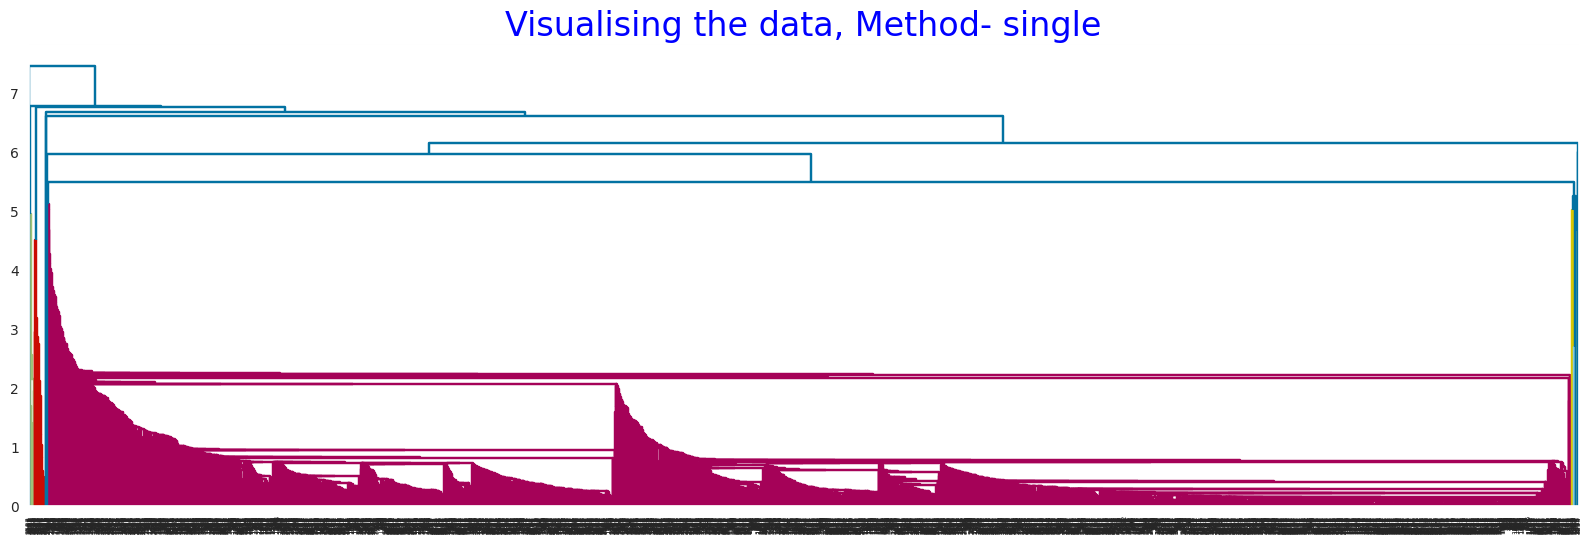

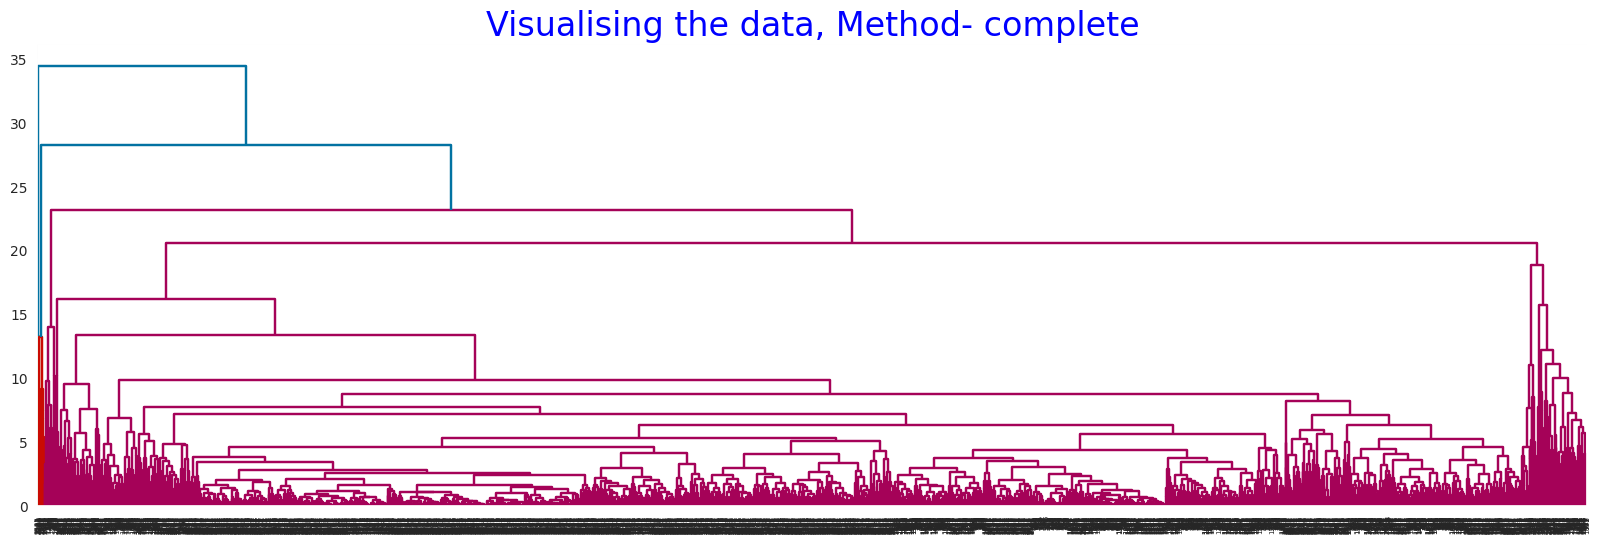

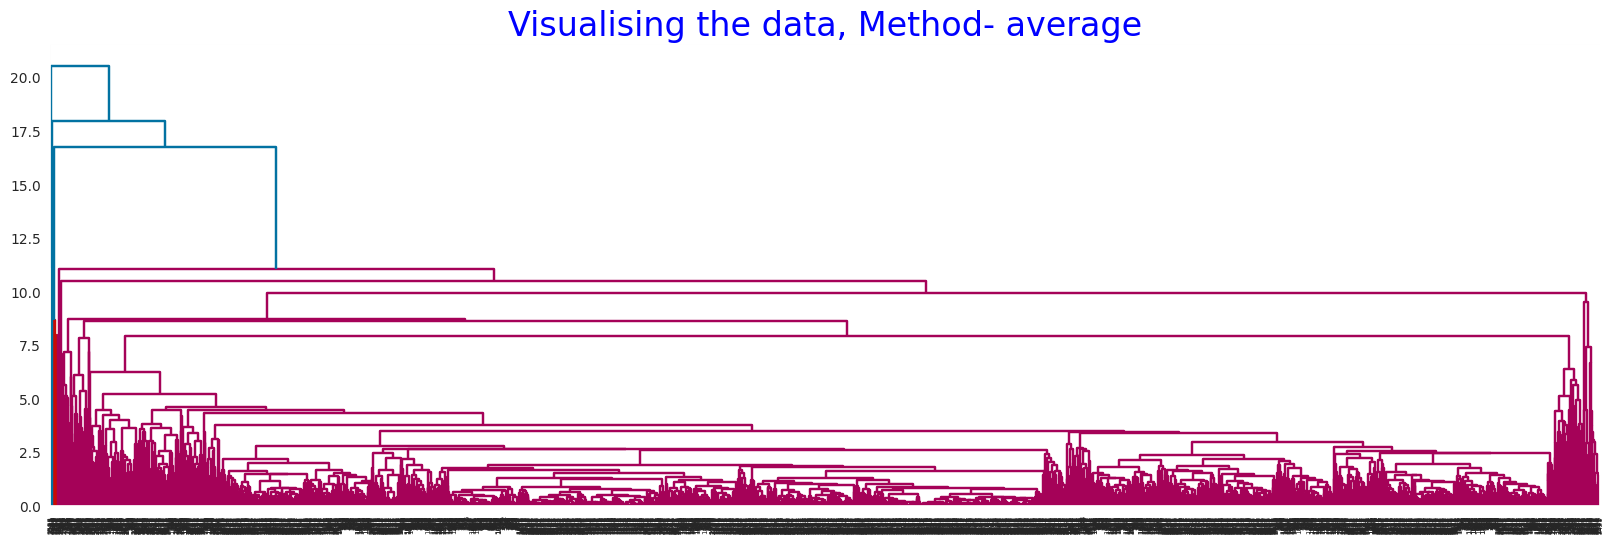

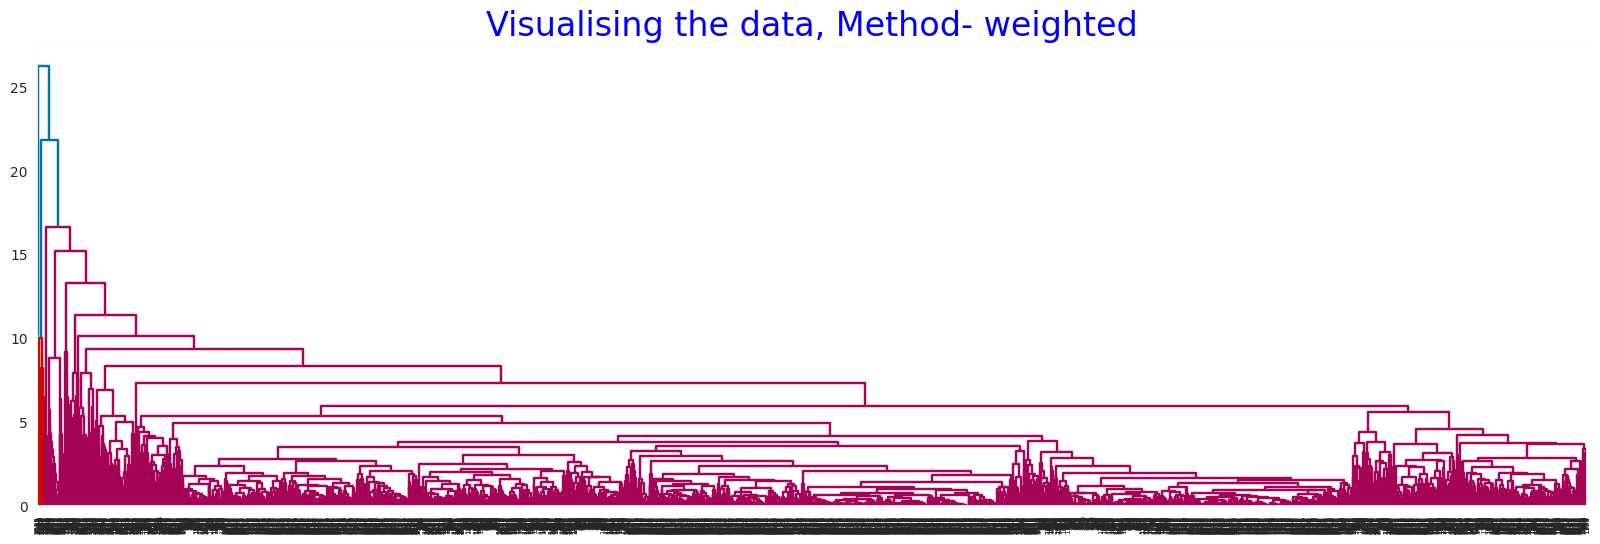

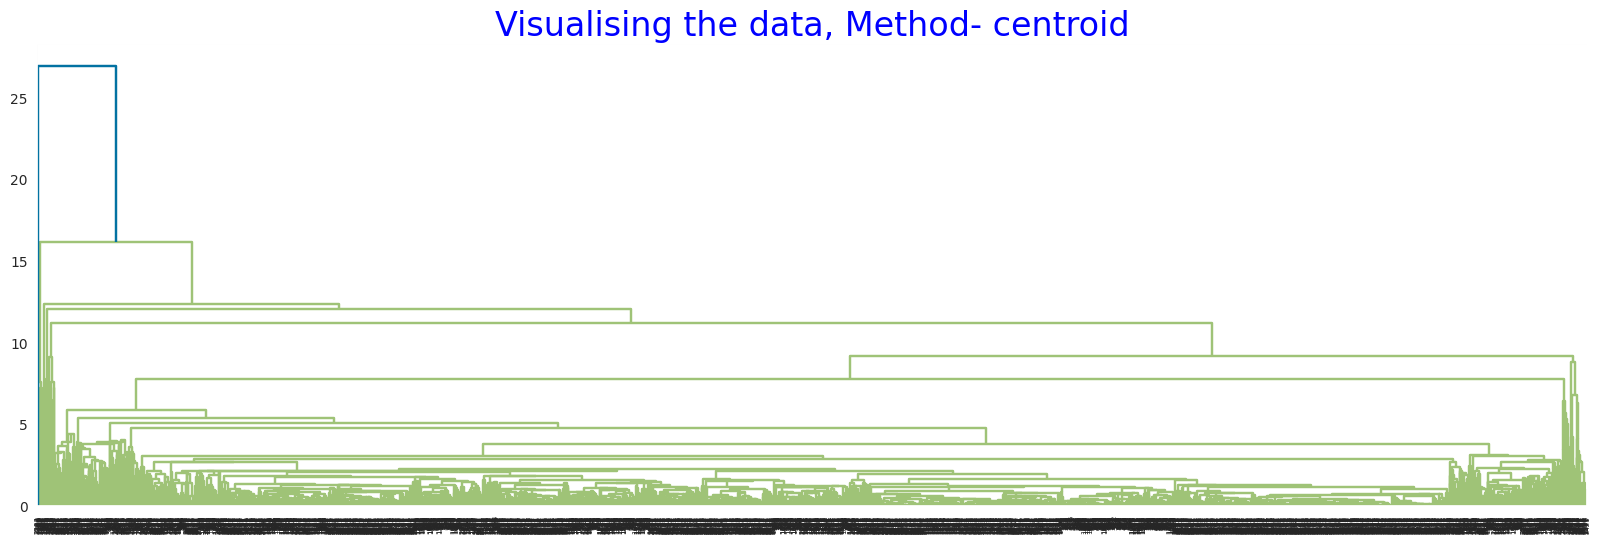

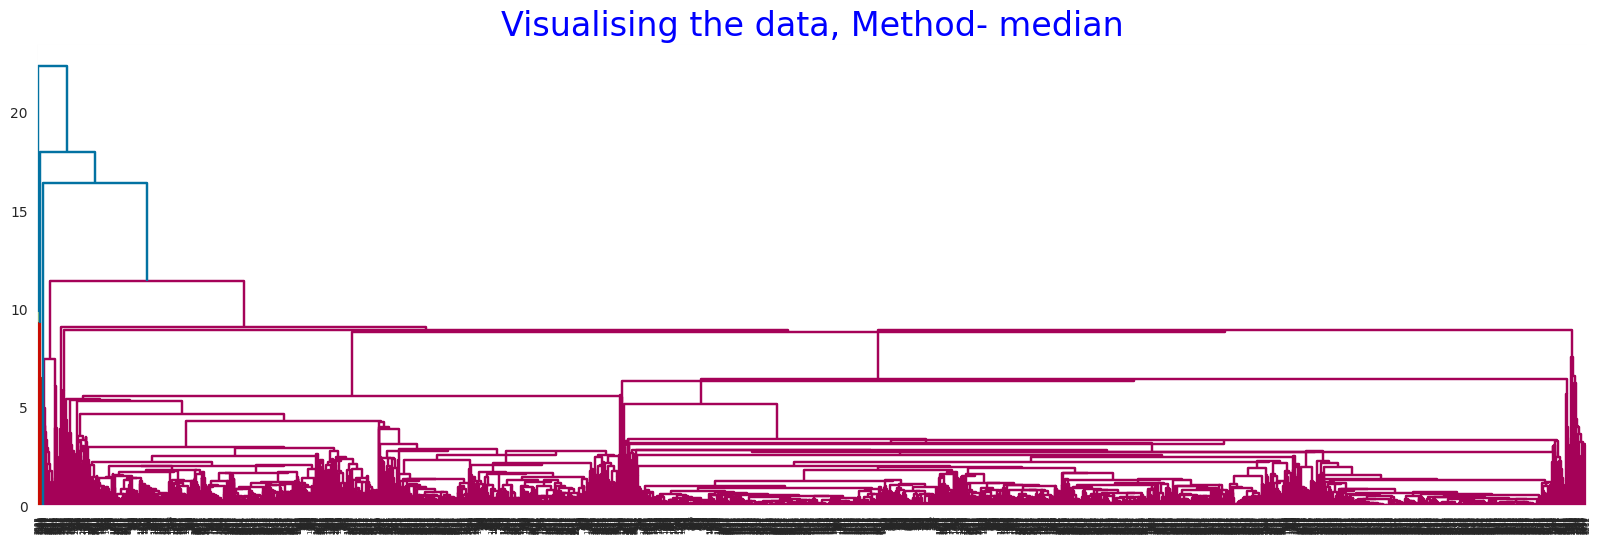

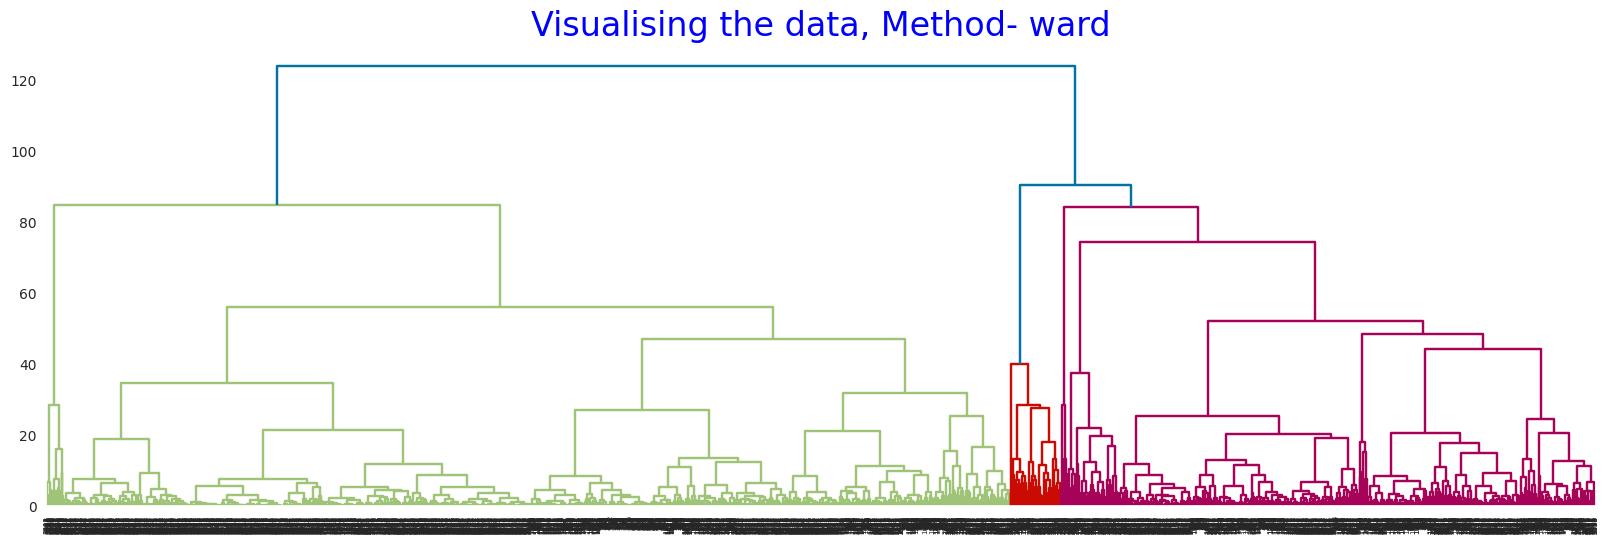

In [214]:
# Create Dendrogram for scale data

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(scale_data, method = methods,optimal_ordering=False))

In [190]:
# For scale data
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(scale_data)
        silhouette_score1 = sil(scale_data, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2891560488062143
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562622335599249

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2939395016802131
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760498283333268
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838424148089893
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350131896585496

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.308036175465823
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985292155693238
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7730785441296635
For n_

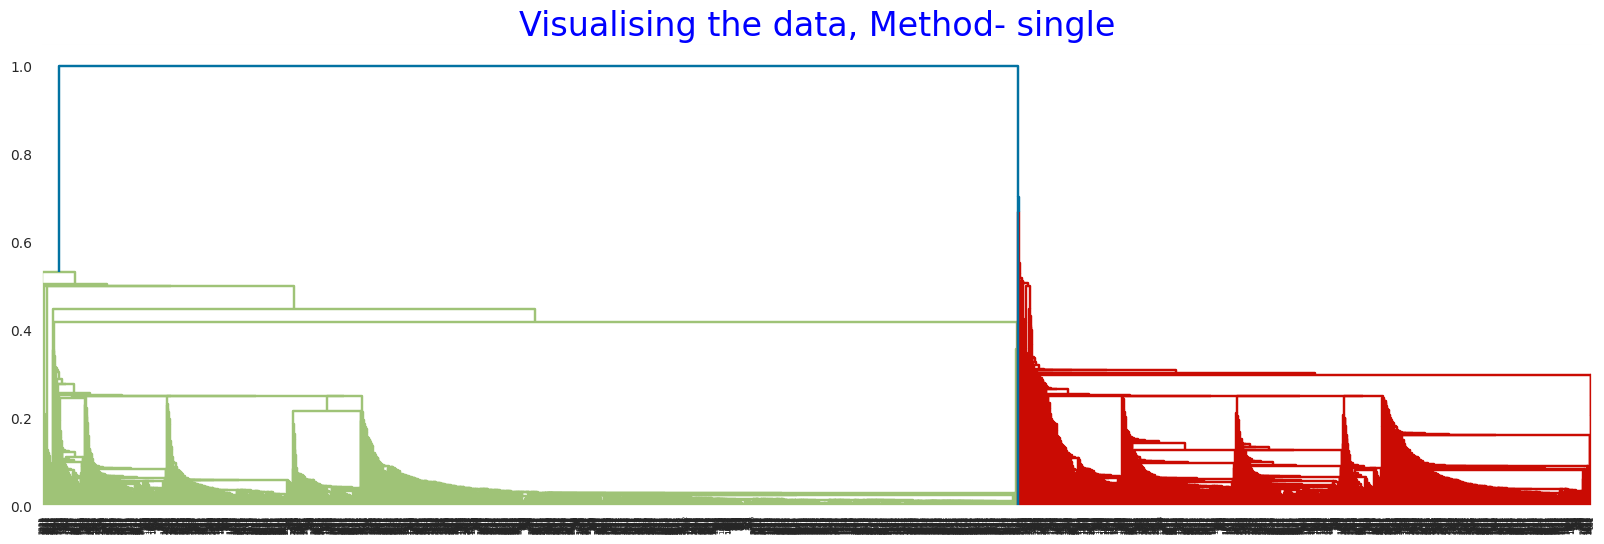

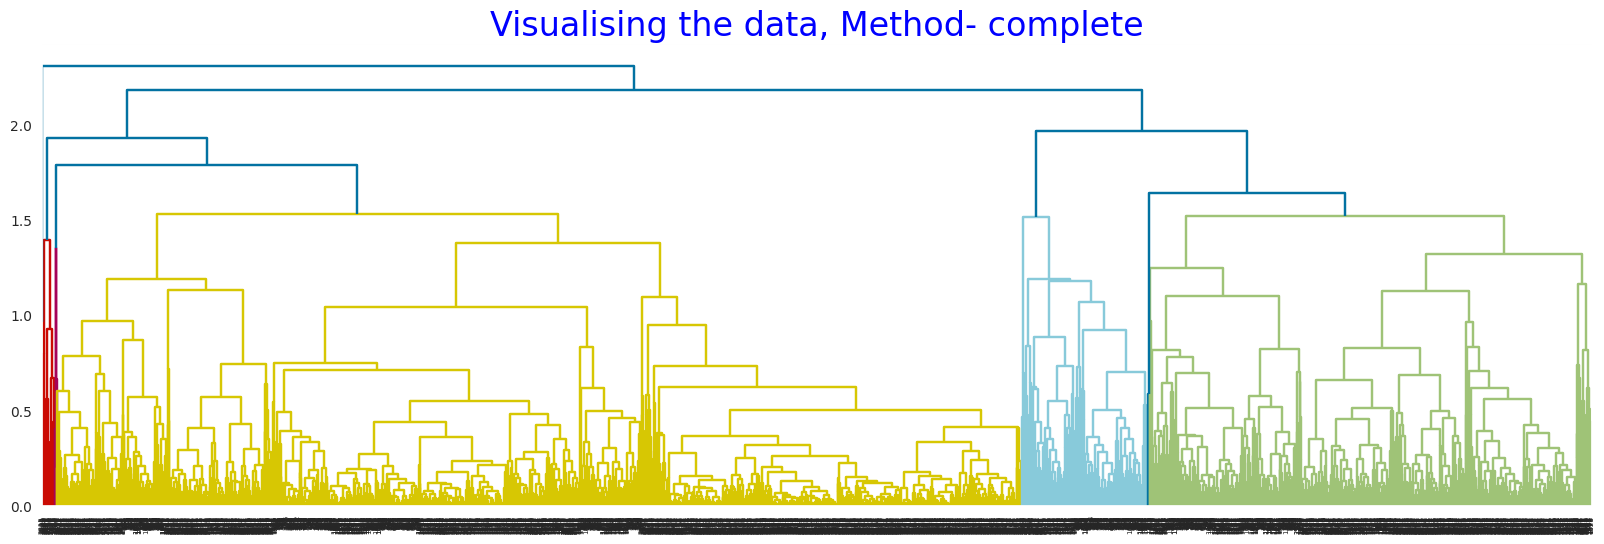

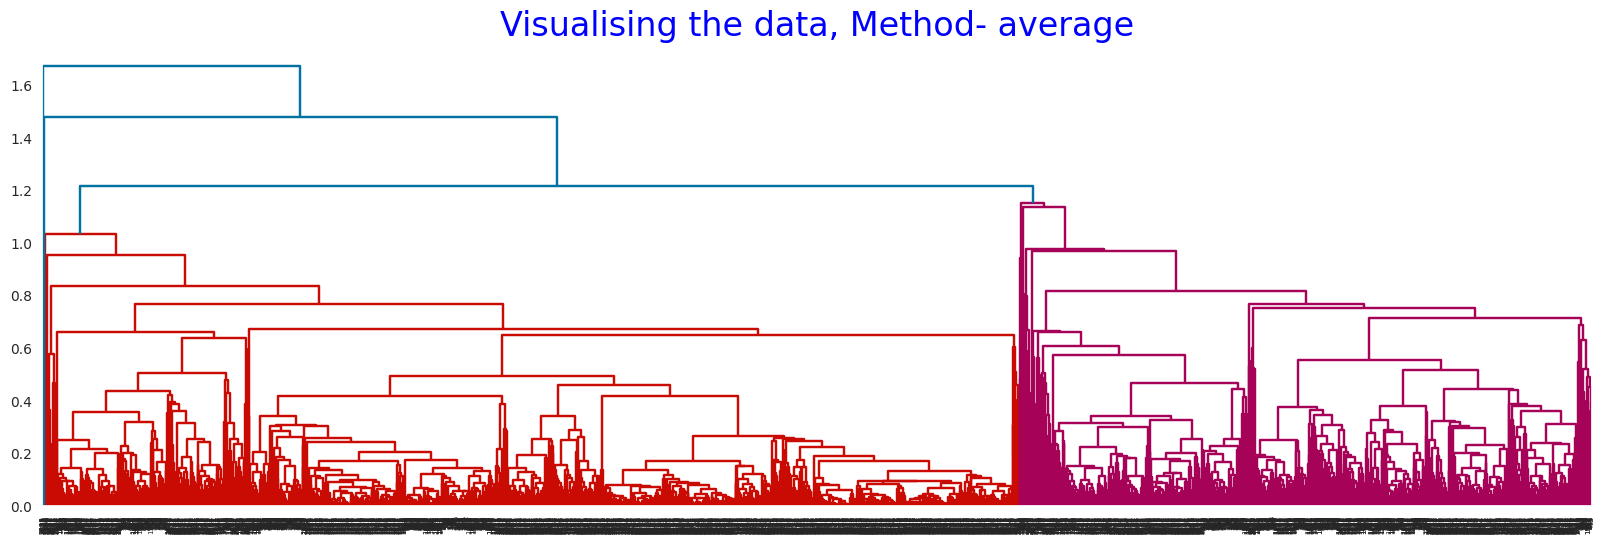

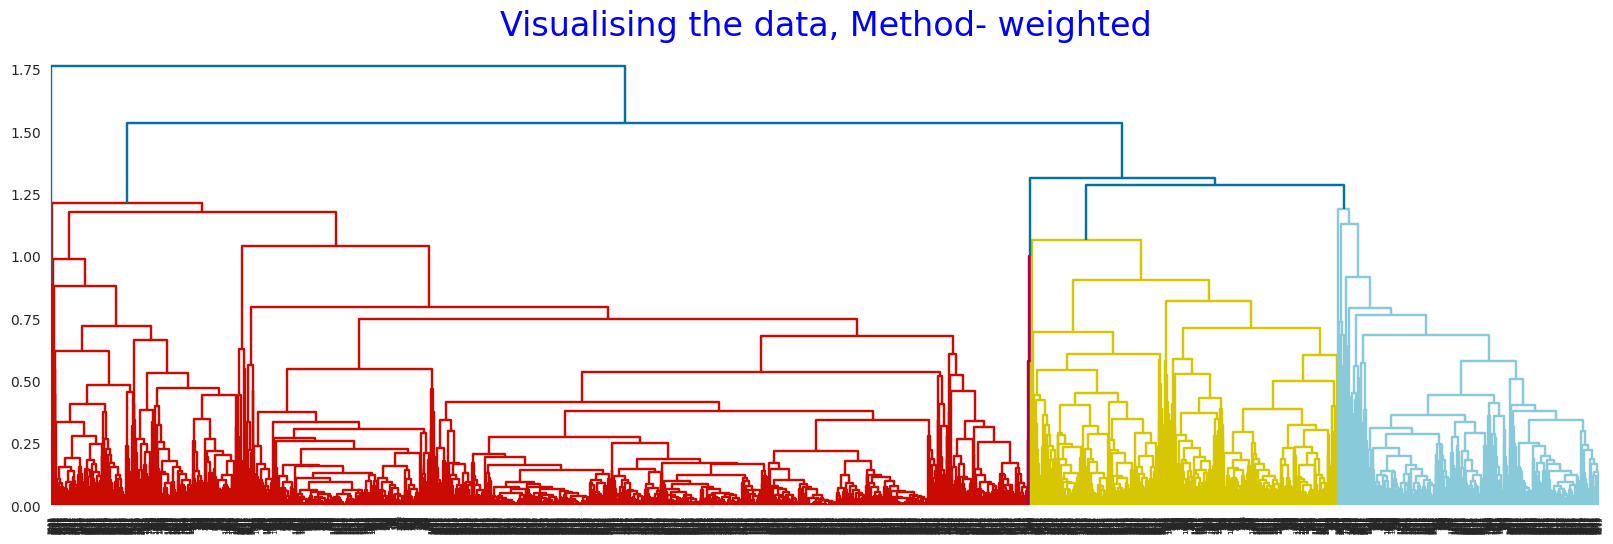

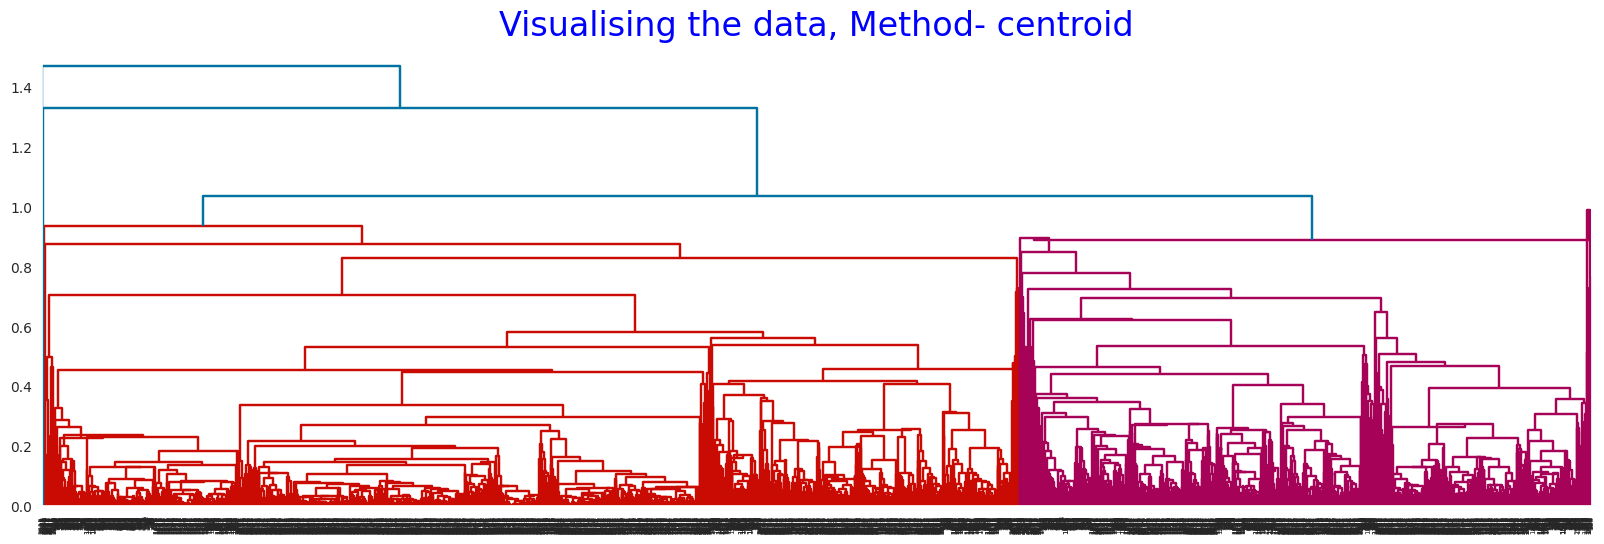

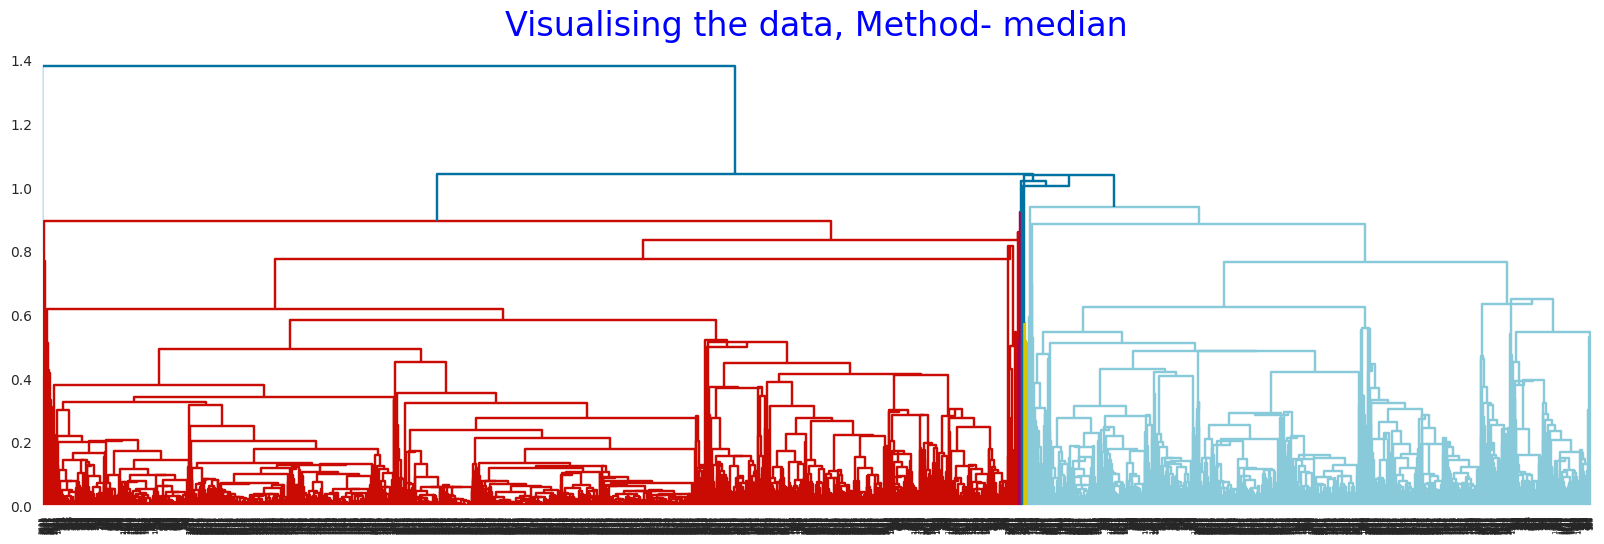

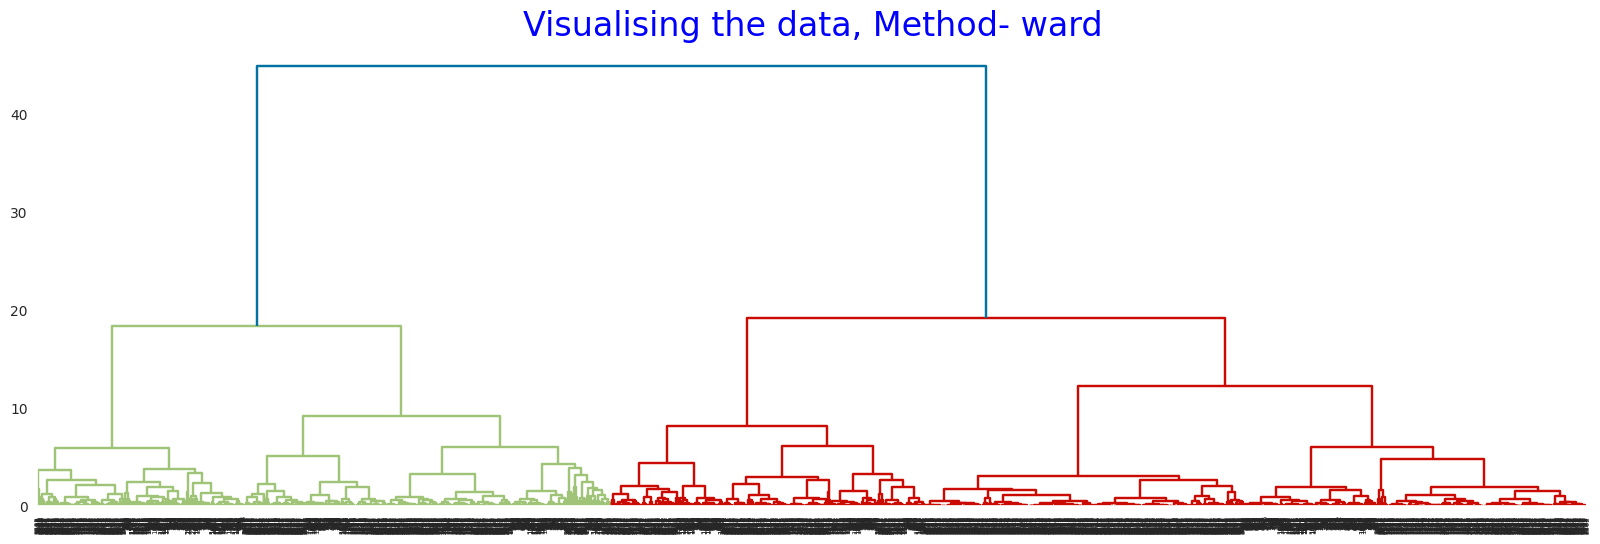

In [247]:
# Create Dendrogram for MINMAX data

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_data, method = methods,optimal_ordering=False))

In [146]:
# for MIN MAX data
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_data)
        silhouette_score1 = sil(minmax_data, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

In [250]:
# create cluster
hc = AgglomerativeClustering(n_clusters= 6 , affinity ="euclidean", linkage ="complete")

In [251]:
# fit the data set into the model
hc.fit(scale_data)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=6)

In [252]:
# save clusters for chart
y_hc = hc.fit_predict(scale_data)

In [253]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
# Cluster numbers
hc.n_clusters_

6

In [255]:
# Clustering Score

(sil(scale_data, hc.labels_)*100).round(3)

54.037

In [256]:
data["h_clusteres"]= y_hc

In [257]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new,h_clusteres,DBSCAN_labels,ClusterID_minmax
ID,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,1,0


In [209]:
data["h_clusteres"].value_counts()

0    3781
1    127 
5    43  
4    28  
2    15  
3    4   
Name: h_clusteres, dtype: int64

In [258]:
data.groupby('h_clusteres').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new,DBSCAN_labels,ClusterID_minmax
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusteres,,,,,,,,,,,,,,
0,65919.236974,137.407035,2.033853,1.000000,1.000793,15575.488231,10.727321,270.656969,0.818567,4072.949220,0.350436,1.715419,0.350436,1.285374
1,133459.291339,334.472441,2.629921,1.000000,1.000000,45139.023622,29.842520,5246.244094,15.157480,4949.787402,0.811024,0.212598,0.811024,1.055118
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.000000,0.533333,1.400000
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,0.000000,1.000000,1.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143,0.750000,0.857143,0.928571
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.000000,0.395349,1.395349


## DBSCAN Clustering
Here making cluster on MINMAX data

In [223]:
dbscan = DBSCAN(eps = 1, min_samples = 22)
dbscan.fit(minmax_data)

DBSCAN(eps=1, min_samples=22)

In [224]:
# -1 are the noise points in our dataset and the rest are the clusters
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [229]:
(sil(minmax_data, dbscan.labels_)*100).round(3)

53.589

In [259]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new,h_clusteres,DBSCAN_labels,ClusterID_minmax
ID,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,1,0


In [226]:
data["DBSCAN_labels"].value_counts()

0    2517
1    1481
Name: DBSCAN_labels, dtype: int64

In [260]:
data.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_new,h_clusteres,ClusterID_minmax
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,,
0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0,1.851808,0.073103,1.493445
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1.392302,0.210668,0.908845
